In [1]:
import stumpy
import matplotlib.pyplot as plt
import src.utility.utility_light_curve as ut_lc
from scipy.stats import zscore

/Users/thanapolphungtua-eng/source_code/VENV/thesis_sourcecode/lib/python3.10/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
FOLDER_LC = ut_lc.get_list_LCfolder()
LIST_FILES = ut_lc.get_list_file(pattern='sq', height=1, duration='60')
SUB_SEQ_SIZE_LIST = [60, 200]
TOP_K_LIST = [100, 20]
WINDOW_SIZE = 20
FILE_NAME = '41246321313755520_3'
INDEX_MAIN = 2837

lc_file = FILE_NAME
data = ut_lc.get_data_from_file(file_name=lc_file, height=3,
                                duration=60, pattern='sq')
set_ans = set(data['ansList'])
nor_data = zscore(data["instances"])
mp = stumpy.stump(nor_data, m=200, normalize=True)
mp_series = mp[:, 0]
nearest_neighbor_idx = mp[data['ansList'][0], 1]

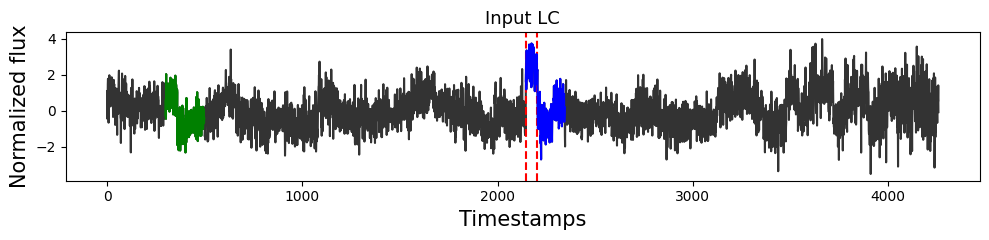

In [3]:
plt.figure(figsize=(10, 2.5))
plt.plot(nor_data,'black', alpha =0.8)
plt.axvline(data['ansList'][0],color='r', linestyle='--')
plt.axvline(data['ansList'][-1],color='r', linestyle='--')

plt.plot(range(nearest_neighbor_idx,nearest_neighbor_idx+200),nor_data[nearest_neighbor_idx:nearest_neighbor_idx+200], 'green')
plt.plot(range(data['ansList'][0],data['ansList'][0]+200),nor_data[data['ansList'][0]:data['ansList'][0]+200], 'blue')
plt.xlabel('Timestamps', fontsize=15)
plt.ylabel('Normalized flux', fontsize=15)
plt.title('Input LC', fontsize=13)
plt.tight_layout()
plt.show()

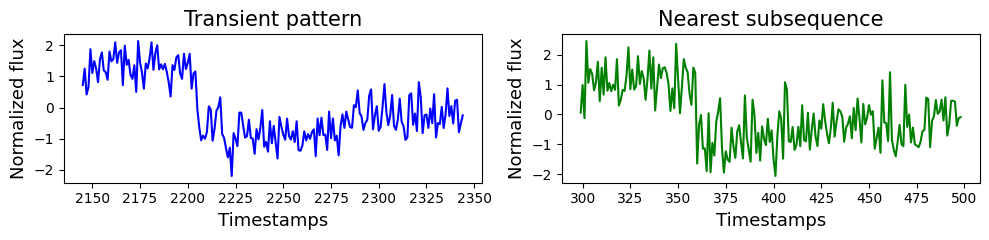

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 2.5))

tran = zscore(nor_data[data['ansList'][0]:data['ansList'][0]+200])

axes[0].plot(range(data['ansList'][0],data['ansList'][0]+200),tran, 'blue')
axes[0].set_title('Transient pattern', fontsize=15)
axes[0].set_xlabel('Timestamps', fontsize=13)
axes[0].set_ylabel('Normalized flux', fontsize=13)

nearest = zscore(nor_data[nearest_neighbor_idx:nearest_neighbor_idx+200])
axes[1].plot(range(nearest_neighbor_idx,nearest_neighbor_idx+200),nearest, 'green')
axes[1].set_title('Nearest subsequence', fontsize=15)
axes[1].set_xlabel('Timestamps', fontsize=13)
axes[1].set_ylabel('Normalized flux', fontsize=13)


plt.tight_layout()
plt.show()